## Scraping all data from the UEFA Champions league website
The data has been obtained using the match information table on the righthand side of all matchpages. Unfortunately there is no information available (at least not to my knowledge) of season 2006 - 2007.

The websites that are used in equation makeLinksToSeason are similar to [this one](https://www.uefa.com/uefachampionsleague/history/season=2002/matches/round=1633/match=69700/events/index.html). That is why the array for each season has the following structure.

The seasons have the following structure:
- season[0] = the seasons in the match-overview link, this is the value of the year in which the final is played
- season[1] = the first value for day in the match-overview link, this stands for the first qualifying round
- season[2] = the final value for day in the match-overview link, this stands for the final
- season[3] = the value to store the files

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

goal_location = "Goal information"
plt.style.use('..\\personal_plot.mplstyle')

In [2]:
seasons = ["S1516", "S1415", "S1314", "S1213", "S1112", "S1011", 
           "S0910", "S0809", "S0708", "S0506", "S0405", "S0304", 
           "S0203", "S0102", "S0001", "S9900", "S9899", "S9798", 
           "S9697", "S9596", "S9495", "S9394", "S9293"]

In [3]:
def make_df(json):
    return pd.DataFrame.from_dict(json)

### Average number of goals per match and total goals

In [4]:
goals_seasons = []
matches_seasons = []
seasons_seasons = []

for season in seasons:
    goals = 0
    matches = 0
    with open(os.path.join(goal_location, season + ".json")) as f:
        season_data = json.load(f)
        
        for match in season_data:
            matches += 1
            
            df = make_df(season_data[match])
            goals += len(df.index)
    
    goals_seasons.append(goals)
    matches_seasons.append(matches)
    seasons_seasons.append(season)

goals_seasons = list(reversed(goals_seasons))
matches_seasons = list(reversed(matches_seasons))
seasons_seasons = list(reversed(seasons_seasons))
    
print("Total number of goals is:   {}".format(sum(goals_seasons)))
print("Total number of matches is: {}".format(sum(matches_seasons)))
print("Average goals per match is: {0:.2f}".format(sum(goals_seasons) / sum(matches_seasons)))

Total number of goals is:   25262
Total number of matches is: 9532
Average goals per match is: 2.65


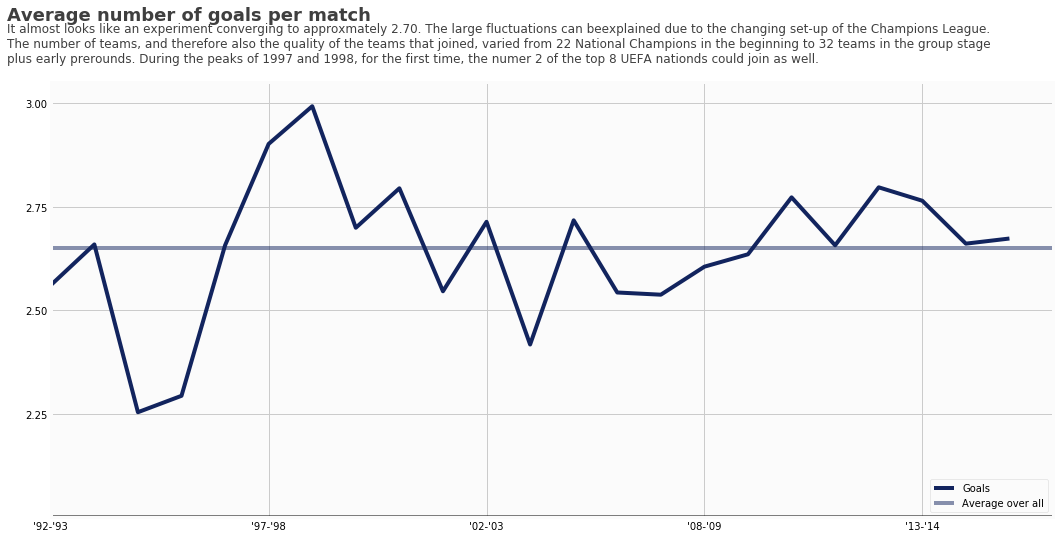

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))

x = np.linspace(0, len(seasons) - 1, len(seasons))

ax.plot(x, np.array(goals_seasons) / np.array(matches_seasons), label = "Goals")
ax.axhline(y = sum(goals_seasons) / sum(matches_seasons), alpha = 0.5, label = "Average over all")
ax.legend(loc='lower right')

ax.set_yticks([2.25, 2.50, 2.75, 3.0])
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_xticklabels(["'92-'93", "'97-'98", "'02-'03", "'08-'09", "'13-'14"])

plt.text(x = -1, 
         y = 3.2, 
         s = "Average number of goals per match",
         fontsize = 18, weight = 'bold', alpha = .75)
plt.text(x = -1, 
         y = 3.1, 
         s = "It almost looks like an experiment converging to approxmately 2.70. The large fluctuations can be" +\
             "explained due to the changing set-up of the Champions League. \nThe number of teams, and therefore " +\
             "also the quality of the teams that joined, varied from 22 National Champions in the beginning to " +\
             "32 teams in the group stage \nplus early prerounds. During the peaks of 1997 and 1998, for the " +\
             "first time, the numer 2 of the top 8 UEFA nationds could join as well.", 
         fontsize = 12, alpha = .75)

ax.set_xlim([0, len(seasons_seasons)])
ax.set_ylim([2.0, 3.05])
ax.axhline(y = 2.0, color = 'black', alpha = 0.5)

plt.savefig("..\\..\\uijl.github.io_blog\\figures\\football-average-goals-per-match.png", bbox_inches = "tight")
plt.show()

### Analysing the timeperiod when goals are scored
Check the minutes in the first half and the second half.

In [6]:
goals_first_half  = []
goals_second_half = []

for season in seasons:
    with open(os.path.join(goal_location, season + ".json")) as f:
        season_data = json.load(f)

        for match in season_data:
            df = make_df(season_data[match])

            # first half
            periods = ["First half", "First half - Additional time"]
            df_first_half = df.loc[df["Period"].isin(periods)]

            for minute in df_first_half["Minute"]:
                goals_first_half.append(minute)

            # second half
            periods = ["Second half", "Second half - Additional time"]
            df_second_half = df.loc[df["Period"].isin(periods)]

            for minute in df_second_half["Minute"]:
                goals_second_half.append(minute)

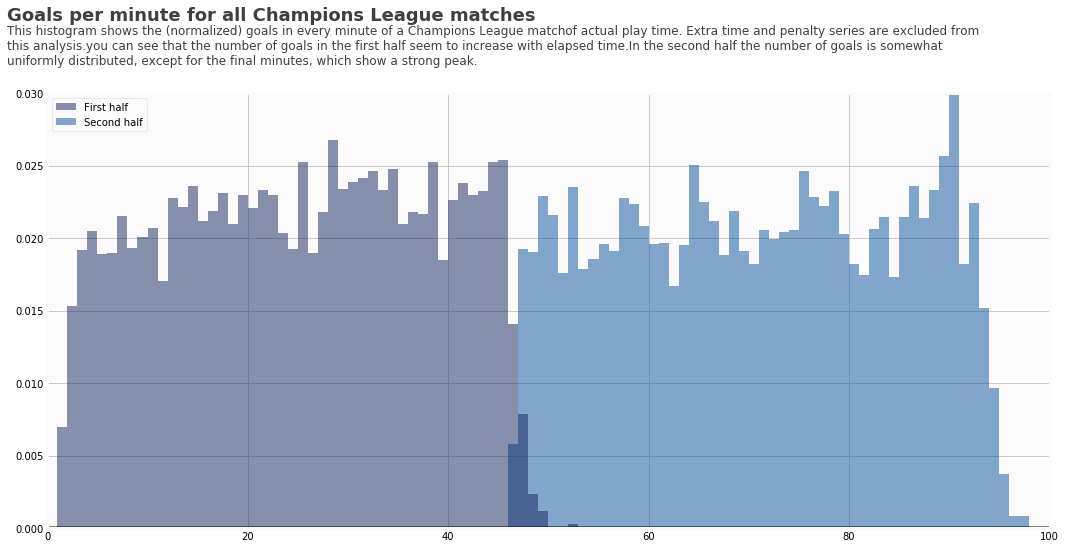

In [7]:
max_minute_half_1 = max(goals_first_half)
max_minute_half_2 = max(goals_second_half)

bins = np.linspace(0, max_minute_half_2, 1+ max_minute_half_2)

fig, ax = plt.subplots(figsize=(16, 8))

ax.hist(goals_first_half, bins, alpha=0.5, label="First half", density=True, zorder=2)
ax.hist(goals_second_half, bins, alpha=0.5, label="Second half", density=True, zorder=1)
ax.legend(loc='upper left')

ax.set_xlim([0, 100])
ax.set_ylim([0, 0.03])
ax.axhline(y = 0, color = 'black', alpha = 0.5)

plt.text(x = -4, 
         y = 0.035, 
         s = "Goals per minute for all Champions League matches",
         fontsize = 18, weight = 'bold', alpha = .75)
plt.text(x = -4, 
         y = 0.032, 
         s = "This histogram shows the (normalized) goals in every minute of a Champions League match" +\
             "of actual play time. Extra time and penalty series are excluded from \nthis analysis." +\
             "you can see that the number of goals in the first half seem to increase with elapsed time." +\
             "In the second half the number of goals is somewhat \nuniformly distributed, except for the " +\
             "final minutes, which show a strong peak.", 
         fontsize = 12, alpha = .75)

plt.savefig("..\\..\\uijl.github.io_blog\\figures\\football-goals-per-minute.png", bbox_inches = "tight")
plt.show()

In [8]:
buckets_first_half  = []
buckets_second_half = []

for goal in goals_first_half:
    if goal <= 5:
        buckets_first_half.append(0)
    elif goal <= 10:
        buckets_first_half.append(5)
    elif goal <= 15:
        buckets_first_half.append(10)
    elif goal <= 20:
        buckets_first_half.append(15)
    elif goal <= 25:
        buckets_first_half.append(20)
    elif goal <= 30:
        buckets_first_half.append(25)
    elif goal <= 35:
        buckets_first_half.append(30)
    elif goal <= 40:
        buckets_first_half.append(35)
    elif goal <= 45:
        buckets_first_half.append(40)
    else:
        buckets_first_half.append(45)

for goal in goals_second_half:
    if goal <= 50:
        buckets_second_half.append(45)
    elif goal <= 55:
        buckets_second_half.append(50)
    elif goal <= 60:
        buckets_second_half.append(55)
    elif goal <= 65:
        buckets_second_half.append(60)
    elif goal <= 70:
        buckets_second_half.append(65)
    elif goal <= 75:
        buckets_second_half.append(70)
    elif goal <= 80:
        buckets_second_half.append(75)
    elif goal <= 85:
        buckets_second_half.append(80)
    elif goal <= 90:
        buckets_second_half.append(85)
    else:
        buckets_second_half.append(90)

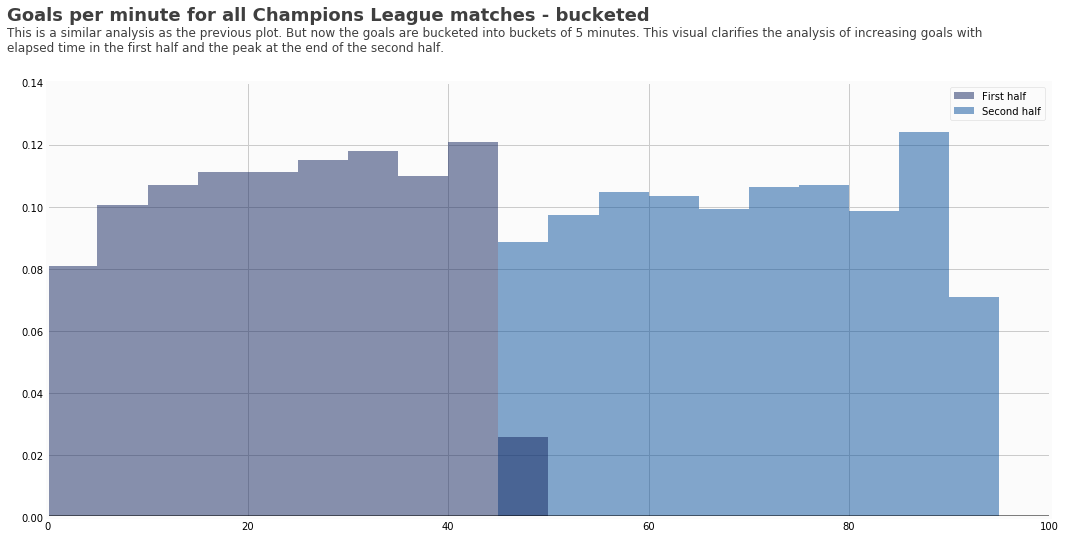

In [9]:
bins = np.linspace(0, 95, 95 + 1)

fig, ax = plt.subplots(figsize=(16, 8))

ax.hist(buckets_first_half, bins, width = 5, alpha=0.5, label="First half", density=True, zorder=2)
ax.hist(buckets_second_half, bins, width = 5, alpha=0.5, label="Second half", density=True, zorder=1)
ax.legend(loc='upper right')

ax.set_xlim([0, 100])
ax.set_ylim([0, 0.14])
ax.axhline(y = 0, color = 'black', alpha = 0.5)

plt.text(x = -4, 
         y = 0.16, 
         s = "Goals per minute for all Champions League matches - bucketed",
         fontsize = 18, weight = 'bold', alpha = .75)
plt.text(x = -4, 
         y = 0.15, 
         s = "This is a similar analysis as the previous plot. But now the goals are bucketed into " +\
             "buckets of 5 minutes. This visual clarifies the analysis of increasing goals with \n" +\
             "elapsed time in the first half and the peak at the end of the second half.", 
         fontsize = 12, alpha = .75)

plt.savefig("..\\..\\uijl.github.io_blog\\figures\\football-goals-per-minute-buckets.png", bbox_inches = "tight")
plt.show()

### Analysing the effect of scoring right before halftime
For this analysis I do not care whether the goal is scored by the home-team or the away-team. I also do not care if more than one goal is scored during a specific *period of interest*, only about the last goal scored before the break. In my opinion there are four interesting options if a team scores. 

- **Team increases its lead.** Only the case if the team goas from a one-goal advantage to a two-goal advantage.
- **Team takes the lead.** Game is tied and before the break one of teams scores)
- **Team ties the game.** The trailing team scores an equaliser right before the break)
- **Team decreases goal difference.** Only if the trailing team reduces the goal difference to 1 right before the break)

For this analysis I will set the *period of interest* from minute 40 to the break. 
<br>Another analysis will be from the break until minute 50.

In [10]:
def make_df_of_period(df, interest, periods, before = False):
    df = df.loc[df["Period"].isin(periods)]
    
    if 0 < len(df):
        minute = max(df["Minute"])
    
        if not before and interest <= minute:
            df = df[df["Minute"] == minute]
        elif not before:
            df = df[interest <= df["Minute"]]
        else:
            df = df[df["Minute"] < minute]
            
    return df

In [11]:
def get_result(df):
    home = 0
    away = 0
    
    for team in df["Team"]:
        if team == "Home":
            home += 1
        else:
            away += 1
    
    if home == away:
        return ["T", 0]
    elif home < away:
        return ["A", away - home]
    else:
        return ["H", home - away]

In [12]:
def event_information(json, interest, periods):
    df = make_df(json)
    
    period_interest = make_df_of_period(df, interest, periods, before = False)
    final_result = get_result(df)
    
    if 0 < len(period_interest):
        # a goal was scored during the period of interest
        before_interest = make_df_of_period(df, interest, periods, before = True)
        before_result = get_result(before_interest)
        
        goal_by = period_interest["Team"][period_interest.index[0]]
        
        return before_result, goal_by, final_result
        
    else:
        # no goals were scored during the period of interest
        return "No goals"

In [13]:
def conclusion(event_information):
    # Option 1 - Team increases its lead.
    if ((event_information[0][0] == "H" and event_information[1] == "Home") or 
        (event_information[0][0] == "A" and event_information[1] == "Away")):
        
        # If the winner is the goal-scoring team
        if event_information[2][0] == event_information[1][0]:
            return "W", "Option 1"
        elif event_information[2][0] == "T":
            return "T", "Option 1"
        else:
            return "L", "Option 1"
    
    # Option 2 - Team takes the lead.
    elif event_information[0][0] == "T":
        
        # If the winner is the goal-scoring team
        if event_information[2][0] == event_information[1][0]:
            return "W", "Option 2"
        elif event_information[2][0] == "T":
            return "T", "Option 2"
        else:
            return "L", "Option 2"
    
    # Option 3 - Team ties the game.
    elif ((event_information[0][0] == "H" and event_information[0][1] == 1 and event_information[1] == "Away") or 
          (event_information[0][0] == "A" and event_information[0][1] == 1 and event_information[1] == "Home")):
        
        # If the goal-scoring team is the winner or when game ends tied
        if event_information[2][0] == event_information[1][0]:
            return "W", "Option 3"
        elif event_information[2][0] == "T":
            return "T", "Option 3"
        else:
            return "L", "Option 3"
        
    # Option 4 - Team decreases goal difference.
    elif ((event_information[0][0] == "H" and event_information[0][1] == 2 and event_information[1] == "Away") or 
          (event_information[0][0] == "A" and event_information[0][1] == 2 and event_information[1] == "Home")):
        
        # If the goal-scoring team is the winner or when game ends tied
        if event_information[2][0] == event_information[1][0]:
            return "W", "Option 4"
        elif event_information[2][0] == "T":
            return "T", "Option 4"
        else:
            return "L", "Option 4"
    
    # Option 5 - A goal was scored but not within our boundary conditions
    else:
        return "Not within constraints"

In [14]:
no_goals = 0
events   = 0
not_acc  = 0

effectiveness = {"Match": [],
                 "Option": [],
                 "Result": []}

for season in seasons:
    with open(os.path.join(goal_location, season + ".json")) as f:
        season_data = json.load(f)
    
        for match in season_data:
            match_events = event_information(season_data[match], 40, ["First half", "First half - Additional time"])
            
            if match_events == "No goals":
                match_conclusion = None
                no_goals += 1
            else:
                match_conclusion = conclusion(match_events)
                
                if match_conclusion == "Not within constraints":
                    not_acc += 1
                else:
                    effectiveness["Match"].append(match)
                    effectiveness["Option"].append(match_conclusion[1])
                    effectiveness["Result"].append(match_conclusion[0])
                    events += 1

effectiveness = pd.DataFrame.from_dict(effectiveness)

print("No goals within period of interest: {}".format(no_goals))
print("Matches taken into acount:          {}".format(events))
print("Matches not taken into acount:        {}".format(not_acc))

No goals within period of interest: 7789
Matches taken into acount:          1721
Matches not taken into acount:        22


### Final result

In [15]:
results = {"Option": [],
           "Matches": [],
           "Wins": [],
           "Ties": [],
           "Losses": []}

for i in range(4):
    option = "Option " + str(i + 1)
    
    temp_df = effectiveness[effectiveness["Option"] == option]
    matches = len(temp_df)
    wins = len(temp_df[temp_df["Result"] == "W"])
    ties = len(temp_df[temp_df["Result"] == "T"])
    losses = len(temp_df[temp_df["Result"] == "L"])
    
    results["Option"].append(option)
    results["Matches"].append(matches)
    results["Wins"].append(str(round(wins / matches * 100, 2)) + "%")
    results["Ties"].append(str(round(ties / matches * 100, 2)) + "%")
    results["Losses"].append(str(round(losses / matches * 100, 2)) + "%")

results = pd.DataFrame.from_dict(results)
results.head()

,Option,Matches,Wins,Ties,Losses
0,Option 1,617,92.87%,5.51%,1.62%
1,Option 2,782,74.42%,15.86%,9.72%
2,Option 3,239,41.84%,23.85%,34.31%
3,Option 4,83,18.07%,15.66%,66.27%


### Just taking into accout every last goal

In [16]:
no_goals = 0
events   = 0
not_acc  = 0

effectiveness = {"Match": [],
                 "Option": [],
                 "Result": []}

for season in seasons:
    with open(os.path.join(goal_location, season + ".json")) as f:
        season_data = json.load(f)
    
        for match in season_data:
            match_events = event_information(season_data[match], 0, ["First half", "First half - Additional time"])
            
            if match_events == "No goals":
                match_conclusion = None
                no_goals += 1
            else:
                match_conclusion = conclusion(match_events)
                
                if match_conclusion == "Not within constraints":
                    not_acc += 1
                else:
                    effectiveness["Match"].append(match)
                    effectiveness["Option"].append(match_conclusion[1])
                    effectiveness["Result"].append(match_conclusion[0])
                    events += 1

effectiveness = pd.DataFrame.from_dict(effectiveness)

print("No goals within period of interest: {}".format(no_goals))
print("Matches taken into acount:          {}".format(events))
print("Matches not taken into acount:        {}".format(not_acc))

No goals within period of interest: 3159
Matches taken into acount:          6338
Matches not taken into acount:        35


In [17]:
results = {"Option": [],
           "Matches": [],
           "Wins": [],
           "Ties": [],
           "Losses": []}

for i in range(4):
    option = "Option " + str(i + 1)
    
    temp_df = effectiveness[effectiveness["Option"] == option]
    matches = len(temp_df)
    wins = len(temp_df[temp_df["Result"] == "W"])
    ties = len(temp_df[temp_df["Result"] == "T"])
    losses = len(temp_df[temp_df["Result"] == "L"])
    
    results["Option"].append(option)
    results["Matches"].append(matches)
    results["Wins"].append(str(round(wins / matches * 100, 2)) + "%")
    results["Ties"].append(str(round(ties / matches * 100, 2)) + "%")
    results["Losses"].append(str(round(losses / matches * 100, 2)) + "%")

results = pd.DataFrame.from_dict(results)
results.head()

,Option,Matches,Wins,Ties,Losses
0,Option 1,1545,94.56%,4.01%,1.42%
1,Option 2,3716,74.35%,16.87%,8.77%
2,Option 3,879,33.67%,33.11%,33.22%
3,Option 4,198,16.16%,26.26%,57.58%
